<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/notebooks/uwwi22_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [115]:
import pandas as pd
import numpy as np

# download data

In [17]:
! wget https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv

--2022-12-01 21:40:50--  https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bsenst/UWWi_DataDive_Dec22/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv [following]
--2022-12-01 21:40:50--  https://raw.githubusercontent.com/bsenst/UWWi_DataDive_Dec22/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11122158 (11M) [text/plain]
Saving to: ‘uwwi_dataset_interactions_

# explore data

In [80]:
uwwi22 = pd.read_csv("/content/uwwi_dataset_interactions_2022.csv")
uwwi22["Interaction_CreateStamp"] = pd.to_datetime(uwwi22.Interaction_CreateStamp, utc=True)
uwwi22["Interaction_EditStamp"] = pd.to_datetime(uwwi22.Interaction_EditStamp, utc=True)
uwwi22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 0 to 7398
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count  Dtype              
---  ------                                                      --------------  -----              
 0   Client_Id                                                   7399 non-null   int64              
 1   Interaction_CreateStamp                                     7399 non-null   datetime64[ns, UTC]
 2   Interaction_ClientId                                        7399 non-null   int64              
 3   Interaction_Id                                              7399 non-null   int64              
 4   Interaction_CreateAccountId_href_label                      7399 non-null   object             
 5   Interaction_CreatePortalId                                  7399 non-null   int64              
 6   Interaction_CreateFormsetDeploymentId                       7399 non-null   int6

In [81]:
uwwi22 = uwwi22.drop("Interaction_AuditStamp", axis=1) # drop this column since entirely
uwwi22.head()

,Client_Id,Interaction_CreateStamp,Interaction_ClientId,Interaction_Id,Interaction_CreateAccountId_href_label,Interaction_CreatePortalId,Interaction_CreateFormsetDeploymentId,Interaction_EditAccountId_href_label,Interaction_EditPortalId,Interaction_EditFormsetDeploymentId,...,InteractionOption_SwfSecondaryNeeds,InteractionOption_SwfCounty,InteractionOption_WhyWasThereNoReferralGiven,InteractionOption_UnableToContact,InteractionCustom_CallerReached,InteractionCustom_FollowUpUnmetNeeds,InteractionCustom_FollowUpComplete,InteractionCustom_FollowUpAttempt1,InteractionCustom_FollowUpAttempt2,InteractionCustom_FollowUpAttempt3
0,22934,2022-12-01 18:53:00.606552+00:00,22934,1405553,Lorena Lezama (805),1,689,Lorena Lezama (805),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
1,24900,2022-12-01 15:59:04.836496+00:00,24900,1405339,Teri Goodman (1258),1,689,Teri Goodman (1258),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
2,27820,2022-12-01 15:57:35.767512+00:00,27820,1405337,Melody Hobbs (743),1,689,Melody Hobbs (743),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
3,34433,2022-12-01 15:56:07.122672+00:00,34433,1405333,Teri Goodman (1258),1,689,Teri Goodman (1258),1,689,...,[],['Racine'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
4,24158,2022-12-01 14:58:26.516401+00:00,24158,1405271,Lorena Lezama (805),1,689,Lorena Lezama (805),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN


In [26]:
# unique client id = number of clients
uwwi22.Client_Id.nunique()

1551

## interactions & county

In [138]:
uwwi22.InteractionOption_SwfCounty.value_counts()

['Milwaukee']                                   2669
[]                                              1629
['La Crosse']                                   1264
['Houston, MN']                                  646
['Waukesha']                                     384
['Clayton, IA']                                  310
['Racine']                                       178
['Eau Claire']                                   134
['Fayette, IA']                                   78
['Chippewa']                                      48
['Monroe']                                         7
['Washington']                                     6
['Kenosha']                                        6
['Jefferson']                                      5
['Other']                                          4
['Ozaukee']                                        4
['Sheboygan']                                      4
['Brown']                                          3
['Jackson']                                   

## interaction & need

In [134]:
uwwi22.InteractionOption_SwfPrimaryNeeds.value_counts()[:20]

['Supportive Listening']                     2030
[]                                           1629
['Other']                                     798
['Shelter']                                   732
['Food']                                      544
['Mental Health']                             531
['Utility/Energy']                            364
['Housing Payment Assistance']                229
['Directory Assistance']                      149
['Crisis']                                     93
['Legal Assistance']                           45
['Transportation']                             38
['Other Financial Assistance']                 36
['Mental Health', 'Crisis']                    23
['Substance Use']                              14
['Housing Payment Assistance', 'Shelter']      10
['Mental Health', 'Supportive Listening']      10
['Housing Payment Assistance', 'Other']         9
['Food', 'Housing Payment Assistance']          9
['Mental Health', 'Other']                      9


In [28]:
# most interactions include referrals
uwwi22.InteractionOption_211CallType.value_counts()

['Information and Referral']    6663
['Information Only']             440
[]                               187
['Crisis']                        80
['No Referral Given']             29
Name: InteractionOption_211CallType, dtype: int64

## interaction & time

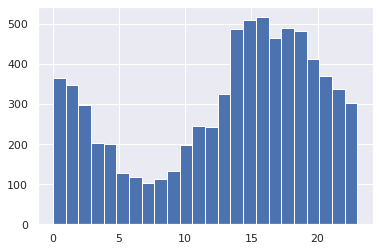

In [111]:
pd.Series([date.hour for date in uwwi22.Interaction_CreateStamp]).hist(bins=24)
# interaction creation per hour of the day

In [132]:
# interaction creation distribution by month
months22 = pd.Series([date.month for date in uwwi22.Interaction_CreateStamp])
print("mean created interactions per month", round(months22.value_counts().mean(), 1))
months22.value_counts().sort_index()

mean created interactions per month 616.6


1     756
2     630
3     673
4     657
5     705
6     714
7     721
8     667
9     586
10    623
11    654
12     13
dtype: int64